# importing libraryes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io , img_as_float
from skimage.restoration import denoise_nl_means , estimate_sigma

# Reading Image

(array([1.22209e+05, 2.66400e+03, 1.64600e+03, 1.90700e+03, 6.26000e+02,
        5.44000e+02, 4.90000e+02, 9.91000e+02, 4.78000e+02, 4.87000e+02,
        1.08900e+03, 5.51000e+02, 6.36000e+02, 5.96000e+02, 1.30000e+03,
        6.29000e+02, 6.56000e+02, 6.63000e+02, 1.42800e+03, 6.90000e+02,
        7.08000e+02, 1.53800e+03, 6.64000e+02, 7.30000e+02, 7.46000e+02,
        1.52900e+03, 7.27000e+02, 7.64000e+02, 7.65000e+02, 1.46900e+03,
        6.54000e+02, 7.22000e+02, 1.40100e+03, 7.30000e+02, 6.96000e+02,
        7.09000e+02, 1.39300e+03, 7.08000e+02, 7.37000e+02, 7.24000e+02,
        1.48500e+03, 6.88000e+02, 6.38000e+02, 1.37300e+03, 6.74000e+02,
        6.65000e+02, 6.94000e+02, 1.39800e+03, 6.58000e+02, 7.19000e+02,
        1.40800e+03, 7.18000e+02, 7.44000e+02, 7.06000e+02, 1.37000e+03,
        7.30000e+02, 6.95000e+02, 6.76000e+02, 1.38300e+03, 7.11000e+02,
        6.89000e+02, 1.45100e+03, 7.50000e+02, 8.03000e+02, 7.15000e+02,
        1.66400e+03, 8.41000e+02, 8.48000e+02, 8.32

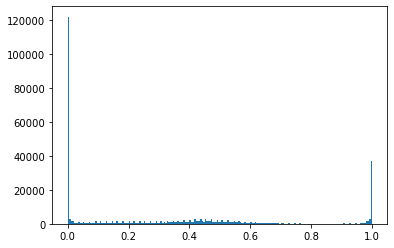

In [2]:
img = img_as_float(io.imread('zahemer.jpeg'))
plt.hist(img.flat , bins = 200 , range = (0,1))

# Insert Segma

In [3]:
sigma_est = np.mean(estimate_sigma(img , multichannel = True))
print(f"the sigma estimate is {sigma_est}")

the sigma estimate is nan


C:\Users\mahmo\anaconda3\envs\super_nova\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mahmo\anaconda3\envs\super_nova\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Define Pach

In [4]:
pach_kw = dict(patch_size = 5 ,
              patch_distance = 6,
              multichannel = True)

# Dignose Image

(array([105805.,   2273.,   1477.,   1327.,   1100.,    939.,    891.,
           702.,    586.,    672.,    715.,    613.,    580.,    606.,
           648.,    751.,    837.,    977.,   1039.,   1220.,   1293.,
          1378.,   1257.,   1287.,   1141.,   1043.,   1036.,   1081.,
          1105.,   1051.,   1082.,   1012.,   1073.,   1009.,   1105.,
          1054.,   1220.,   1168.,   1183.,   1282.,   1319.,   1240.,
          1244.,   1261.,   1229.,   1191.,   1136.,   1163.,   1132.,
          1137.,   1099.,   1081.,   1039.,   1077.,   1088.,   1106.,
          1178.,   1205.,   1174.,   1202.,   1173.,   1194.,   1193.,
          1194.,   1169.,   1253.,   1219.,   1345.,   1348.,   1436.,
          1472.,   1488.,   1525.,   1586.,   1708.,   1666.,   1796.,
          1744.,   1867.,   1969.,   2012.,   2092.,   2177.,   2210.,
          2142.,   2244.,   2265.,   2208.,   2044.,   1958.,   1950.,
          1832.,   1781.,   1709.,   1632.,   1566.,   1548.,   1603.,
      

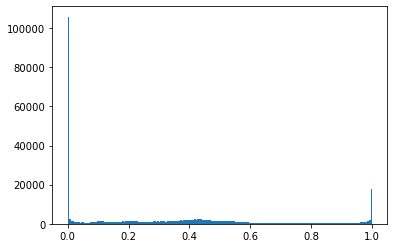

In [5]:
dignose_img = denoise_nl_means(img , h = 1.15 * sigma_est , fast_mode = True , **pach_kw)
plt.hist(dignose_img.flat , bins = 200 , range = (0,1))

# Equalization Image

(array([105104.,    134.,   2253.,    427.,   1491.,    651.,   1293.,
           803.,   1341.,    919.,   1217.,    955.,   1066.,    967.,
          1081.,    945.,   1175.,    948.,   1029.,    924.,    987.,
           943.,    999.,    995.,    890.,    910.,    919.,    932.,
           926.,    853.,    897.,    815.,    855.,    846.,    877.,
           845.,    843.,    795.,    776.,    834.,    880.,    850.,
           825.,    845.,    884.,    836.,    882.,    832.,    873.,
           879.,    822.,    899.,    930.,    892.,    859.,    894.,
           926.,    892.,    889.,    923.,    904.,    887.,    917.,
           874.,    886.,    928.,    939.,    934.,    889.,    912.,
           890.,    948.,    943.,    965.,    961.,   1055.,   1052.,
           999.,    983.,   1028.,   1058.,   1147.,   1087.,   1139.,
          1050.,   1051.,   1080.,   1130.,   1102.,   1073.,   1114.,
          1130.,   1164.,   1132.,   1115.,   1227.,   1158.,   1243.,
      

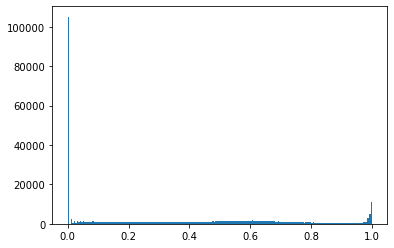

In [6]:
from skimage import exposure

eq_image = exposure.equalize_adapthist(dignose_img)
plt.hist(eq_image.flat , bins = 200 , range = (0,1))

# Showing Image After Preprossing

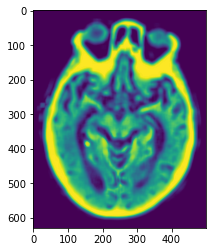

In [7]:
plt.imshow(eq_image)

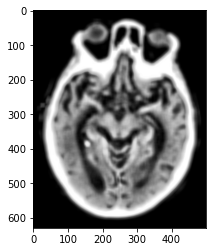

In [8]:
plt.imshow(eq_image , cmap = 'gray')

# Create Markers

In [9]:
markers = np.zeros(img.shape , dtype = np.uint)
markers [(eq_image < 0.2) & (eq_image > 0.0)] = 1
markers [(eq_image > 0.3) & (eq_image < 0.7)] = 2

# Showing Markers

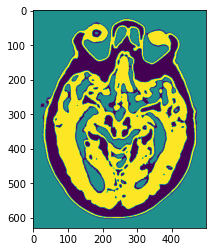

In [10]:
plt.imshow(markers)

# Creating Labels

In [11]:
from skimage.segmentation import random_walker

labels = random_walker(eq_image , markers , beta = 10 , mode = 'bf')

# Showing Labels

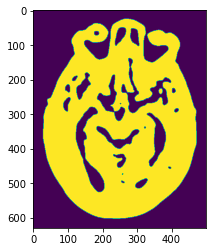

In [12]:
plt.imshow(labels)

# Define Sigmas

In [13]:
sigma1 = (labels == 1)
sigma2 = (labels == 2) 

all_sigmas = np.zeros((eq_image.shape[0] , eq_image.shape[1] , 3))

all_sigmas[sigma1] = (1,0,0)
all_sigmas[sigma2] = (0,1,0)

# Showing Sigmas

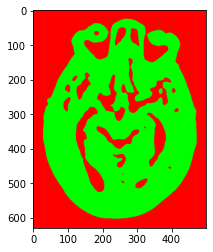

In [14]:
plt.imshow(all_sigmas)

# Showing Markers After Sigmentation

In [15]:
marker1 = (markers == 1)
marker2 = (markers == 2) 

all_markers = np.zeros((markers.shape[0] , markers.shape[1] , 3))

all_markers[marker1] = (1,0,0)
all_markers[marker2] = (0,1,0)

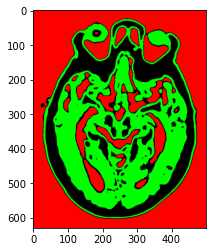

In [16]:
plt.imshow(all_markers)

# Great Job